In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import KFold

In [47]:
df = pd.read_csv(r"C:\MasterThesis\v1.0\pupil_dataset.csv")
print(df.shape)
df = df.dropna()
print(df.shape)
labels = df['labels']
df = df.drop(df.columns[-1], axis=1)
X = df
y = labels

(3240, 676)
(2160, 676)


In [48]:
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

In [49]:
# normalizacja danych
scaler = StandardScaler()
X = scaler.fit_transform(X)

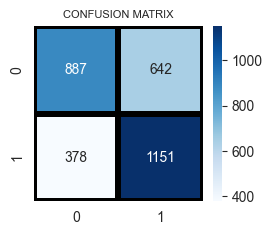

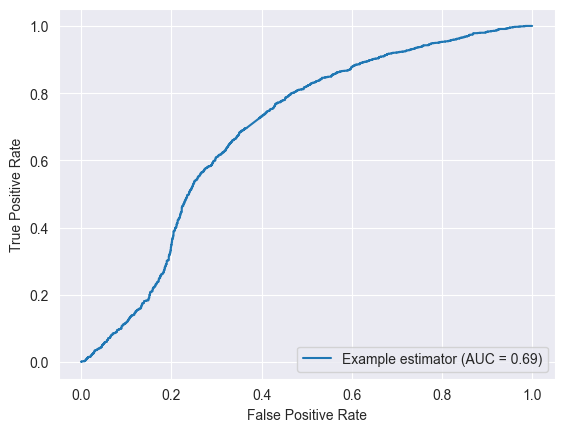

Average Accuracy: 66.64352298296367%
Average AUC: 0.6902527993254381


In [50]:
# Setting up the KFold parameters
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

accuracy_list = []
roc_auc_list = []
# Lists to store predictions and true labels
y_true_global = []
y_pred_global = []
y_pred_prob_global = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = SVC(kernel='linear', probability=True)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

    y_true_global.extend(y_test)
    y_pred_global.extend(predictions)
    y_pred_prob_global.extend(y_pred_prob)

avg_accuracy = sum(accuracy_list) / n_splits
avg_roc_auc = sum(roc_auc_list) / n_splits
#Confusion matrix
plt.figure(figsize=(6, 5))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_true_global, y_pred_global), annot=True, cmap="Blues", fmt="d", linecolor="k",
            linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=8)
# ROC curve
fpr, tpr, _ = roc_curve(y_true_global, y_pred_prob_global)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example estimator')
display.plot()
plt.show()
print(f"Average Accuracy: {avg_accuracy * 100}%")
print(f"Average AUC: {avg_roc_auc}")

In [51]:
CROSS_VALIDATION = True
if not CROSS_VALIDATION:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = SVC(kernel='linear', probability=True)

    # trenowanie modelu
    model.fit(X_train, y_train)

    # przewidywanie na danych testowych
    predictions = model.predict(X_test)

    # sprawdzanie dokładności modelu
    accuracy = accuracy_score(y_test, predictions)

    print(f"Accuracy: {accuracy * 100}%")
    #Confusion matrix
    plt.figure(figsize=(6, 5))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d", linecolor="k", linewidths=3)
    plt.title("CONFUSION MATRIX", fontsize=8)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example estimator')
    display.plot()
    plt.show()